In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
import pandas.core.common as com
from pandas.core.index import Index
from scipy.cluster.hierarchy import dendrogram, linkage
from pandas.tools import plotting
from pandas.tools.plotting import scatter_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.lines as mlines

Laden der Daten zu StatistikerInnen in einen data frame. Als features werden "land", "gebiet" (=Tätigkeitsfeld), "jahr" (=Geburtsjahr) verwendet.

In [20]:
df_full = pd.read_excel("stat.xls")
mat=df_full.as_matrix()
name=mat[:,0]
print df_full

                     name land  gebiet  jahr
0            pearson egon   uk   tests  1805
1       kolmogorov andrey  rus  theory  1903
2                Kullback  usa  theory  1907
3                Jeffreys   uk  theory  1891
4               Chebyshev  rus  theory  1821
5                 Fischer   uk   tests  1962
6                   Bayes   uk  theory  1761
7                 Laplace   fr  theory  1749
8                 Poisson   fr  theory  1781
9            pearson karl   uk   tests  1857
10         francis galton   uk   descr  1822
11                kendall   uk   tests  1983
12                 neyman  pol   tests  1894
13               spearman   uk   descr  1863
14                   gini  ita   descr  1884
15   Carl Friedrich Gauss  ger  theory  1777
16  Florence Nightingdale   uk   descr  1820
17      Jerome H Friedman  usa  theory  1939
18            Frank Yates   uk  theory  1902
19             John Tukey  usa    test  1915
20              David Cox   uk  theory  1924


In den nächsten Schritten werden die beiden kategorischen Variablen "land" und "gebiet" one-hot kodiert.

In [26]:
df = df_full.drop('name', 1)
features=df.columns
jahr=df_full['jahr']
jahr = scale(jahr)
df = df.drop('jahr', 1)

In [27]:
data=df.to_dict('records')
vec = DictVectorizer()
onehot=vec.fit_transform(data).toarray()

df_1 = pd.DataFrame(onehot)
df_jahr=pd.DataFrame(jahr)

d=pd.concat([df_1,df_jahr], axis=1)
dat=d.as_matrix()

Definition der Funktionen zur Berechnung des "Abstands" zwischen 2 StatistikerInnnen und zur Ermittlung der innercluster-Distanzen von StatistikerInnen im gleichen cluster.

In [23]:
def abstand2( stat1, stat2 ):
    
    abstand = 0
    for i in range(12):
        abstand += (dat[stat1,i] - dat[stat2,i]) * (dat[stat1,i] - dat[stat2,i])
        #print abstand
    
    abstand = abstand**0.5  
    return abstand

def clusterDistance( indexList ):
    
    size = len(indexList)
    clusterDist = 0
    
    for listIndex1 in range(size):
        for listIndex2 in range(listIndex1+1,size):
            
            clusterDist += abstand2(indexList[listIndex1],indexList[listIndex2])
            #print clusterDist
    
    
    #print indexList[3]
    
    return clusterDist

Agglomeratives clustering:

In [25]:
Z_eucl = linkage(dat, 'average', 'euclidean')
print Z_eucl

[[  1.00000000e+01   1.60000000e+01   3.05855606e-02   2.00000000e+00]
 [  3.00000000e+00   1.80000000e+01   1.68220583e-01   2.00000000e+00]
 [  5.00000000e+00   1.10000000e+01   3.21148386e-01   2.00000000e+00]
 [  2.00000000e+01   2.20000000e+01   4.20551458e-01   3.00000000e+00]
 [  7.00000000e+00   8.00000000e+00   4.89368969e-01   2.00000000e+00]
 [  2.00000000e+00   1.70000000e+01   4.89368969e-01   2.00000000e+00]
 [  1.30000000e+01   2.10000000e+01   6.42296772e-01   3.00000000e+00]
 [  0.00000000e+00   9.00000000e+00   7.95224575e-01   2.00000000e+00]
 [  1.00000000e+00   4.00000000e+00   1.25400798e+00   2.00000000e+00]
 [  6.00000000e+00   1.50000000e+01   1.43522489e+00   2.00000000e+00]
 [  1.90000000e+01   2.60000000e+01   1.44027988e+00   3.00000000e+00]
 [  2.50000000e+01   3.00000000e+01   1.44153340e+00   4.00000000e+00]
 [  2.70000000e+01   2.80000000e+01   1.49874512e+00   5.00000000e+00]
 [  2.40000000e+01   3.10000000e+01   1.65407542e+00   6.00000000e+00]
 [  2.

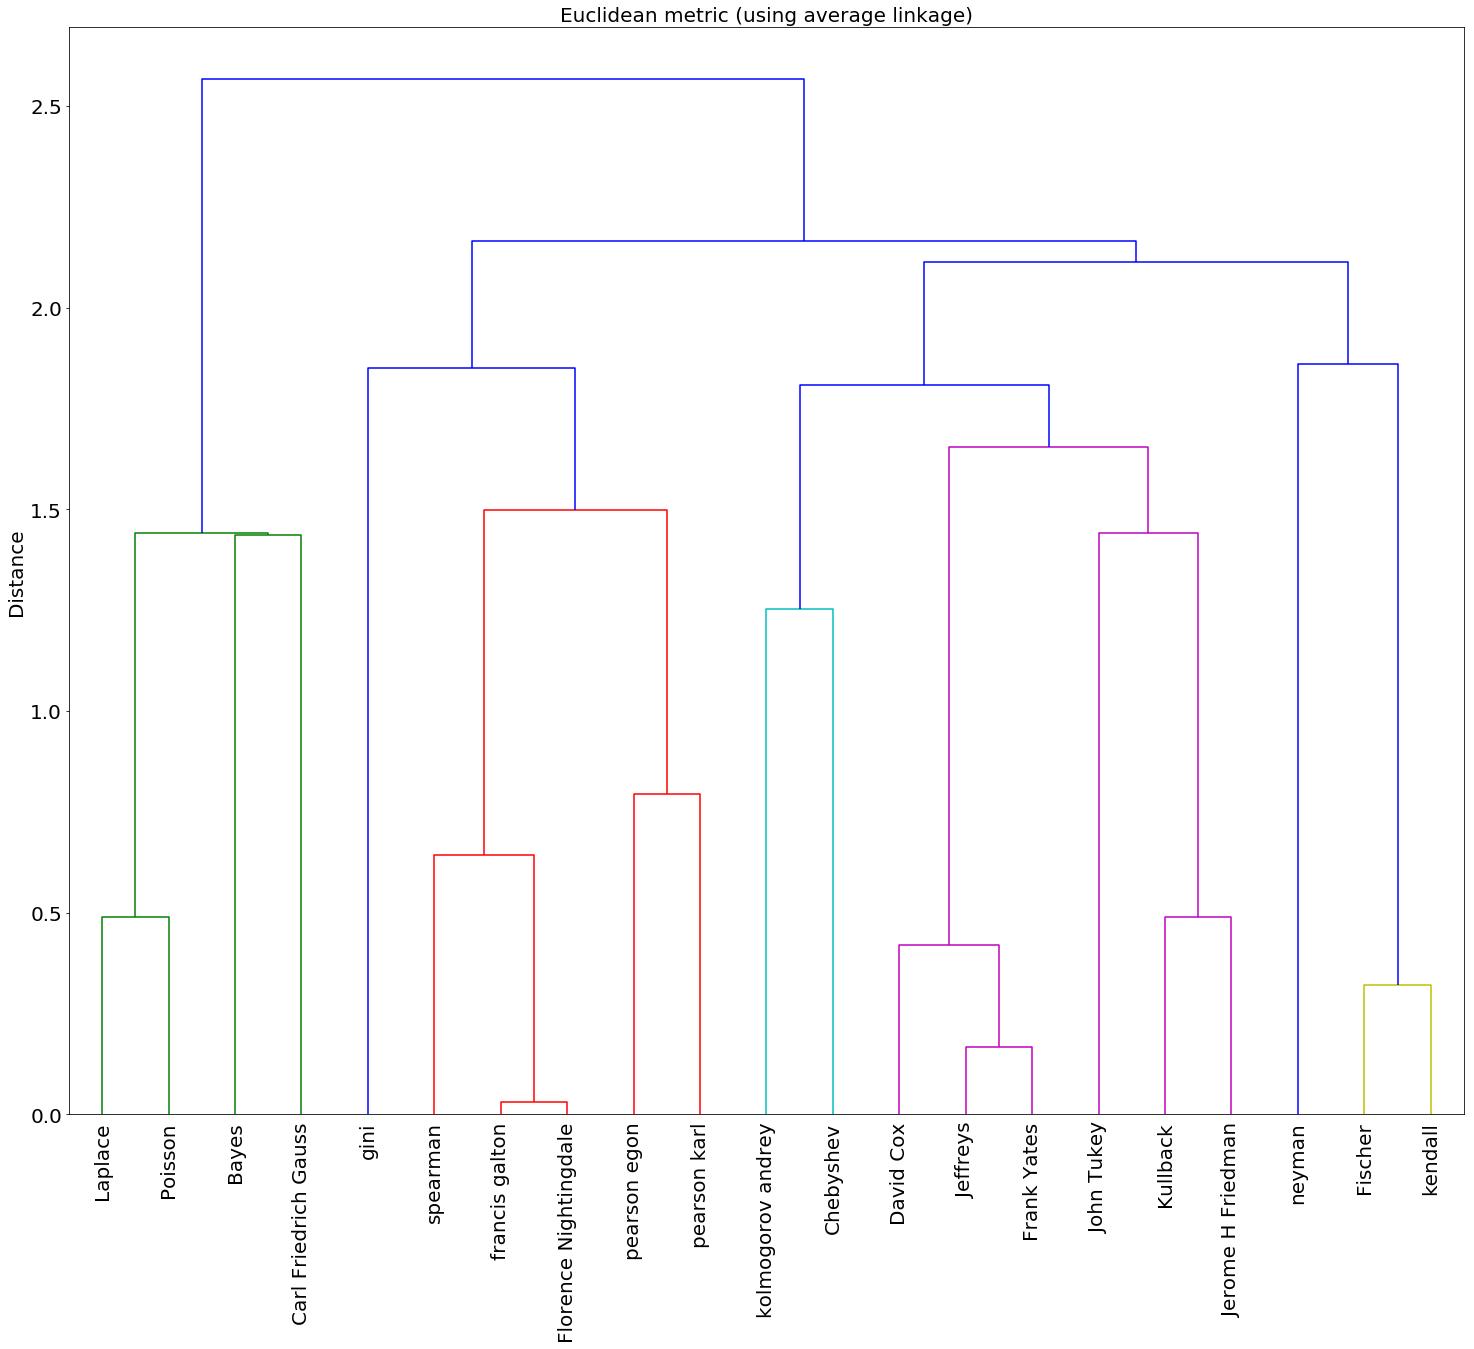

In [8]:
plt.figure(figsize=(25, 20))
#fancy_dendrogram(Z_eucl, leaf_rotation=90, leaf_font_size=8,color_threshold=0.5)
dendrogram(Z_eucl,labels=name,leaf_rotation=90,color_threshold=1.7)
#dendrogram(Z_eucl,leaf_rotation=90,color_threshold=1.7)
plt.title('Euclidean metric (using average linkage)',fontsize=20)
plt.ylabel('Distance',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [9]:
kmeans_res=[]
aggl_res=[]

Ermittlung der jeweiligen inner-cluster Distanzen:

In [10]:
# 4 cluster:
list4_1 = [7,8,6,15]
list4_2=[14,13,10,16,0,9]
list4_3=[1,4,20,3,18]
list4_4=[19,2,17,12,5,11]

aggl_res.append(clusterDistance( list4_1 ) + clusterDistance( list4_2 ) + clusterDistance( list4_3 ) + clusterDistance( list4_4 ))

In [11]:
# 3 cluster:
list3_1 = [7,8,6,15]
list3_2=[14,13,10,16,0,9]
list3_3=[1,4,20,3,18,19,2,17,12,5,11]

aggl_res.append(clusterDistance( list3_1 ) + clusterDistance( list3_2 ) + clusterDistance( list3_3 ))

In [12]:
# 2 cluster:
list2_1 = [7,8,6,15]
list2_2=[14,13,10,16,0,9,1,4,20,3,18,19,2,17,12,5,11]

aggl_res.append(clusterDistance( list2_1 ) + clusterDistance( list2_2 ))

KMeans clustering für 2,3,4 cluster und Ermittlung der jeweiligen inner-cluster Distanzen

In [13]:
k2=KMeans(n_clusters=2)
k2.fit(dat)
labels2=k2.labels_
inertia2=k2.inertia_
print labels2
#print inertia2

[1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0]


In [14]:
liste2_1=[]
liste2_2=[]
for i in range(21):
    
    #print labels2[i]

    if( labels2[i] == 0 ): liste2_1.append(i)
    if( labels2[i] == 1 ): liste2_2.append(i)
        


#Abstand für 2 Cluster:
kmeans_res.append(clusterDistance( liste2_1 ) + clusterDistance( liste2_2 ))

In [15]:
k3=KMeans(n_clusters=3)
k3.fit(dat)
labels3=k3.labels_
inertia3=k3.inertia_
print labels3
print inertia3

[0 1 1 1 2 1 2 2 2 0 0 1 1 0 0 2 0 1 1 1 1]
23.4905890037


In [16]:
liste3_1=[]
liste3_2=[]
liste3_3=[]
for i in range(21):
    
    #print labels2[i]

    if( labels3[i] == 0 ): liste3_1.append(i)
    if( labels3[i] == 1 ): liste3_2.append(i)
    if( labels3[i] == 2 ): liste3_3.append(i)
        

#Abstand für 3 Cluster:
kmeans_res.append(clusterDistance( liste3_1 ) + clusterDistance( liste3_2 ) + clusterDistance( liste3_3 ))

In [17]:
k4=KMeans(n_clusters=4)
k4.fit(dat)
labels4=k4.labels_
inertia4=k4.inertia_
print labels4
print inertia4

[2 0 0 0 1 3 1 1 1 2 2 3 3 2 2 1 2 0 0 0 0]
18.4304515813


In [18]:
liste4_1=[]
liste4_2=[]
liste4_3=[]
liste4_4=[]
for i in range(21):
    
    #print labels2[i]

    if( labels4[i] == 0 ): liste4_1.append(i)
    if( labels4[i] == 1 ): liste4_2.append(i)
    if( labels4[i] == 2 ): liste4_3.append(i)
    if( labels4[i] == 2 ): liste4_4.append(i)
        

#Abstand für 4 Cluster:
kmeans_res.append(clusterDistance( liste4_1 ) + clusterDistance( liste4_2 ) + clusterDistance( liste4_3 ) + clusterDistance( liste4_4 ))

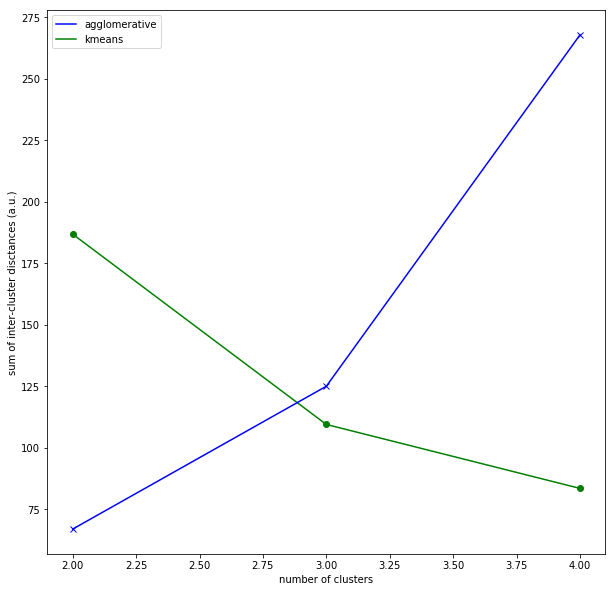

In [35]:
plt.figure(figsize=(10,10))

kmeans=plt.plot(np.linspace(2,4 , 3),kmeans_res, c="g",label="bla1", marker='o')
agglomerative=plt.plot(np.linspace(2,4 , 3),aggl_res, c="b",label="bla1", marker='x')
blue_line =  mlines.Line2D([], [], color='blue', markersize=15, label='agglomerative')
green_line =  mlines.Line2D([], [], color='green', markersize=15, label='kmeans')

plt.legend(handles=[blue_line,green_line])
plt.xlabel("number of clusters")
plt.ylabel("sum of inter-cluster disctances (a.u.)");

plt.show()